# Names and IDs
 1. Fadi Zoabi - 214026775
 2. 

# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct is $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

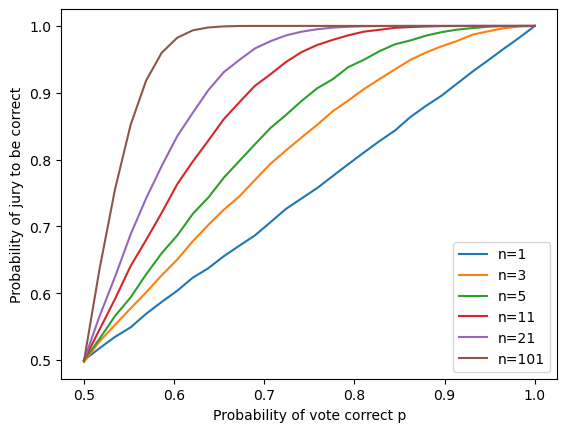

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_jury(p, n, num_simulations=100000):
    # Simulate num_simulations juries of size n
    # Each voter has a probability p of being correct
    votes = np.random.binomial(1, p, size=(num_simulations, n))
    # Determine if the majority is correct
    majority_correct = np.sum(votes, axis=1) > n / 2
    # Return the proportion of correct majorities
    return np.mean(majority_correct)

# Define the range of p and n values to plot
p_values = np.linspace(0.5, 1, 30)
n_values = [1, 3, 5, 11, 21, 101]

# Plot the results

for n in n_values:
    probabilities = [simulate_jury(p, n) for p in p_values]
    plt.plot(p_values, probabilities, label=f'n={n}')

plt.xlabel('Probability of vote correct p')
plt.ylabel('Probability of jury to be correct')
plt.legend()
plt.show()

Your proves goes here

# II. AdaBoost + Semi Supervised (35 points)
Obtaining labeled data is expensive in many real-world scenarios, but unlabeled data is abundant. Semi-supervised learning allows us to improve model performance by leveraging unlabeled data.

In this assignment, you will train an ensemble model (AdaBoost) on a small labeled dataset and then explore how to improve it using additional unlabeled data.

You will use one of the most common image datasets: CIFAR10. The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. [See more](https://en.wikipedia.org/wiki/CIFAR-10)



In [23]:
# Downloading the dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10

# Load CIFAR-10 dataset. 50K train, 10K test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Split the training set into 2K labeled and 48K unlabeled samples
x_labeled, x_unlabeled, y_labeled, _ = train_test_split(
    x_train, y_train, train_size=2000, stratify=y_train, random_state=42
)

**Answer the following questions:**

### EDA - Exploratory Data Analysis (10 pts):
Explore the cifar10 dataset, provide at least three plot-based conclusions about the dataset, and print sample images from each class.

***Write your code below***

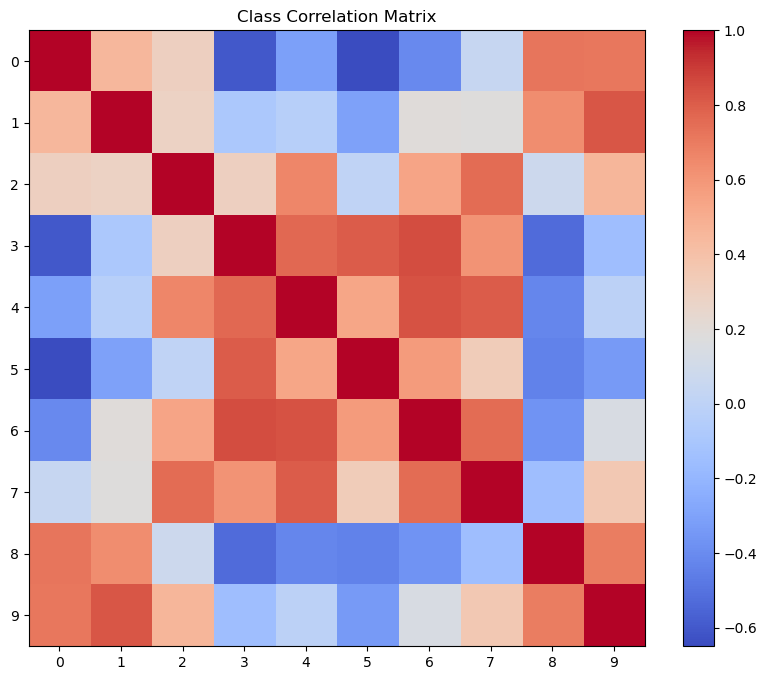

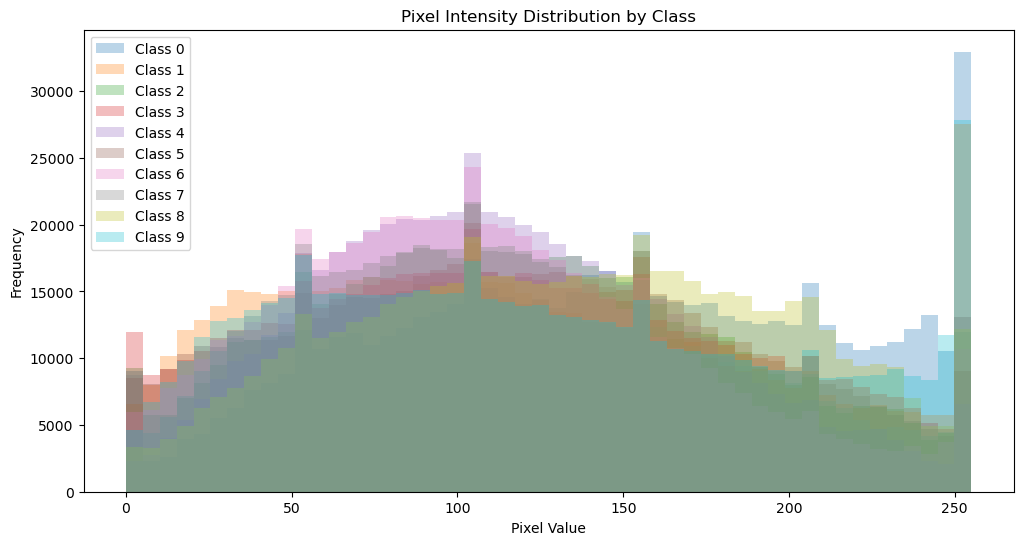

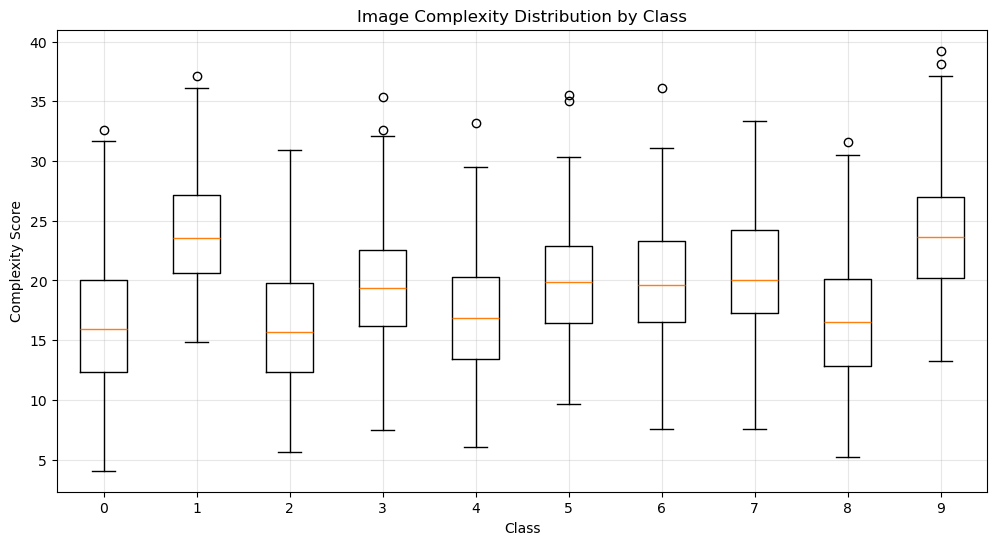

Class 0 average complexity: 16.392
Class 1 average complexity: 23.932
Class 2 average complexity: 16.268
Class 3 average complexity: 19.652
Class 4 average complexity: 17.075
Class 5 average complexity: 19.744
Class 6 average complexity: 19.933
Class 7 average complexity: 20.661
Class 8 average complexity: 16.635
Class 9 average complexity: 23.805


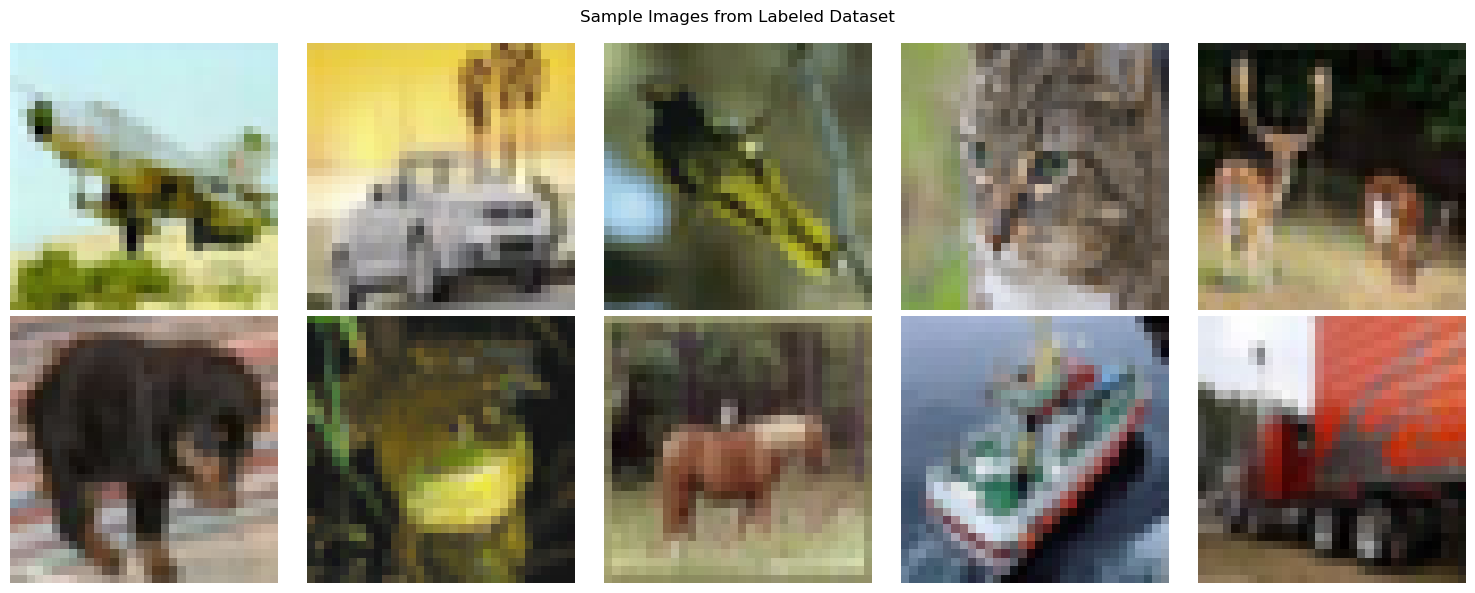

Total training images: 50000
Labeled images: 2000 (4.0%)
Unlabeled images: 48000 (96.0%)
Test images: 10000

Images per class in labeled set: 200 (balanced)


In [ ]:
# Implement here
import numpy as np

# Plot 1: Class Correlation Matrix
plt.figure(figsize=(10, 8))
class_features = np.array([np.mean(x_labeled[y_labeled == i], axis=0).flatten() for i in range(10)])
correlation_matrix = np.corrcoef(class_features)
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Class Correlation Matrix')
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

# Plot 2: Image Intensity Distribution
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.hist(x_labeled[y_labeled == i].ravel(), bins=50, alpha=0.3, label=f'Class {i}')
plt.title('Pixel Intensity Distribution by Class')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot 3: RGB Channel Distribution
# Plot Image Complexity Score by Class
plt.figure(figsize=(12, 6))
complexity_by_class = []

for class_idx in range(10):
    class_images = x_labeled[y_labeled == class_idx]
    class_complexity = []
    
    for img in class_images:
        dx = np.gradient(img)[0]
        dy = np.gradient(img)[1]
        complexity = np.mean(np.sqrt(dx**2 + dy**2))
        class_complexity.append(complexity)
    
    complexity_by_class.append(class_complexity)

plt.boxplot(complexity_by_class, labels=range(10))
plt.title('Image Complexity Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Complexity Score')
plt.grid(True, alpha=0.3)
plt.show()

# Print average complexity per class
for i, complexities in enumerate(complexity_by_class):
    print(f"Class {i} average complexity: {np.mean(complexities):.3f}")


# Plot 3: Image Complexity Score by Class
plt.figure(figsize=(15, 6))
for i in range(10):
    class_indices = np.where(y_labeled == i)[0]
    if len(class_indices) > 0:
        random_index = np.random.choice(class_indices)
        plt.subplot(2, 5, i+1)
        plt.imshow(x_labeled[random_index])
        plt.axis('off')
plt.suptitle('Sample Images from Labeled Dataset')
plt.tight_layout()
plt.show()

# Print dataset statistics
print(f"Total training images: {len(x_train)}")
print(f"Labeled images: {len(x_labeled)} ({len(x_labeled)/len(x_train)*100:.1f}%)")
print(f"Unlabeled images: {len(x_unlabeled)} ({len(x_unlabeled)/len(x_train)*100:.1f}%)")
print(f"Test images: {len(x_test)}")
print(f"\nImages per class in labeled set: {counts[0]} (balanced)")

### Model training and evaluating (10 pts):
Use the x_labeled and y_labeled to train an AdaBoost model, classify the images, and evaluate it using the testing set.

***Write your code below***

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Reshape and scale the data
x_labeled_2d = x_labeled.reshape(x_labeled.shape[0], -1)
x_test_2d = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
x_labeled_scaled = scaler.fit_transform(x_labeled_2d)
x_test_scaled = scaler.transform(x_test_2d)

# Create AdaBoost classifier with SAMME algorithm
adaboost = AdaBoostClassifier(
    n_estimators=10000,
    learning_rate=1,
)

# Train and evaluate
adaboost.fit(x_labeled_scaled, y_labeled)
y_pred = adaboost.predict(x_test_scaled)

# Print results
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


KeyboardInterrupt: 

In [32]:
# find the best hyperparameters for the adaboost classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}
# Create the AdaBoost classifier
adaboost = AdaBoostClassifier()
# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5, n_jobs=-1)
x_train_2d = x_labeled.reshape(x_labeled.shape[0], -1)
grid_search.fit(x_train_2d, y_train)
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [2000, 50000]

### Semi-Supervised usage (5 pts):
Explain how you would use the additional data (x_unlabeled) to improve your model performance.

#### Explain here


### Semi-supervised training (10 pts):
Retrain the new model using x_labeled, x_unlabeled, and y_labeled, evaluate it using the testing set, and show the improvement.

***Write your code below***

In [ ]:
# Implement here

---
# Section 2 - Features (50 Points)
---


### Machine Learning Assignment: Feature Generation, Feature Engineering, and Feature Selection

#### Objective:
The goal of this section is to give you hands-on experience with feature generation, feature engineering, and feature selection using a real-world dataset. You will preprocess the data, create new features, engineer existing features, and select the most relevant features for a machine learning model.

#### Dataset:
For this assignment, you will use the [UCI Machine Learning Repository's "Wine Quality Dataset"](https://archive.ics.uci.edu/ml/datasets/wine+quality). This dataset consists of various physicochemical tests of wine to predict the quality.

1. ## **Data Preprocessing:** (5 points)
   - Load the dataset and perform basic preprocessing steps including handling missing values, encoding categorical variables if any, and normalizing the data.

## EDA - Exploratory Data Analysis (5 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


In [ ]:
# Implement here

In [ ]:
# Explain here

2. ## **Feature Generation:** (5 points)
   - Create at least three new features from the existing data. Explain your reasoning behind the creation of these features.
   - Example: You might create a new feature that is the ratio of alcohol to residual sugar.

In [ ]:
# Implement here

In [ ]:
# Explain here

3. ## **Feature Engineering:** (10 points)
   - Engineer at least three features from the existing data by transforming the original features.
   - Example: You could create polynomial features, interaction features, or apply log transformations.

In [ ]:
# Implement here

In [ ]:
# Explain here

4. ## **Feature Selection:** (10 points)
   - Apply at least two different feature selection methods to identify the most important features.
   - Example methods: Recursive Feature Elimination (RFE), Lasso Regression, or mutual information, NMF.
   - Compare the selected features from each method and discuss the differences.

In [ ]:
# Implement here

In [ ]:
# Explain here

5. ## **Model Building and Evaluation:** (10 points)
   - Using the selected features from the best feature selection method, build and evaluate a machine learning model (e.g., a linear regression model or a decision tree).
   - Split the data into training and test sets, and use appropriate metrics to evaluate the model's performance.

In [ ]:
# Implement here

In [ ]:
# Explain here

6. ## **Report:** (10 points)
   - Write a detailed report explaining each step of your process, including code snippets and results. Discuss the impact of your feature engineering and selection on the model's performance.
   - Provide visualizations where applicable to support your findings.

# Reports goes here

#### Notes:
- Submit a Jupyter Notebook containing your code and full explanations.
- Include the dataset and any additional files needed to run your notebook inside the notebook.
- Ensure your notebook is well-documented with comments and markdown cells explaining your thought process.
- You are encouraged to explore different libraries and methods beyond what was covered in class.
- If you use any external resources or libraries, make sure to cite them appropriately in your notebook.
- Name of file should be changed to EX3_ID1_ID2

Good luck, and have fun exploring the power of feature engineering and selection!